---
# 计算流体力学作业
#### 194801064 郭无极
---
## 一
一维平壁非稳态热传导问题，其控制方程为：
$$\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2 T}{\partial x^2}\tag{1-1} $$
其中：$\alpha = \frac{\lambda}{\rho c}$为扩散系数,已知平壁初始温度为$100$℃，厚度$\delta=0.5m$，将其置于左表面绝热、右表面与周围流体对流换热的环境中，环境流体温度$T_\infty=20$℃，对流换热系数$h=25W/m^2K$；平壁材料$\lambda=150 W/mK，\rho=2500 kg/m^3，c=800 J/kgK$。  
平壁边界条件可表示为：
$$ x=0,\frac{\partial T}{\partial x}\bigg|_{x=0}=0\tag{1-2}$$
$$x=\delta, \lambda\frac{\partial T}{\partial x}\bigg|_{x=0.5}=h(T\big|_{x=0.5} - T\infty)\tag{1-3}$$
试选取适当的时间和空间步长，分别采用显式格式和克拉克-尼科尔森格式的差分方程，自编代码，计算导热体内的温度分布，并给出$60s，300s，600s，1800s$时平壁内的温度分布。

#### 1、显式格式
求解时间选择一阶向前差分，空间选择二阶中心差分，有：
$$\frac{T^{n+1}_i - T^n_i}{\Delta t}=\alpha \frac{T^n_{i+1}-2T^n_i +T^n_{i-1}}{\Delta x^2}\tag{1-4}$$
进而有：
$$T_{i}^{n+1}=T_{i}^{n}+\frac{\alpha\Delta t}{\Delta x^2}(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n})\tag{1-5}$$
由Von Neumann分析方法知$\frac{\alpha\Delta t}{\Delta x^2}\leq \frac{1}{2}$是离散方程收敛的CFL。计算得到$\alpha=7.5e^{-5}$故而选取$dx=0.02，dt=2$,所得如下$\frac{\alpha\Delta t}{\Delta x^2}=0.375\leq \frac{1}{2} $，满足条件。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def calculate_alpha(lamb,rho,c):
    alpha = lamb/(rho*c)
    #print(alpha)
    return alpha

length_wall = 0.5    #墙的厚度
lambda_wall = 150    #热传导系数
rho_wall = 2500      #密度
c_wall = 800         #比热容
h = 25               #对流换热系数
T_far = 20           #远场温度
t_step = [60,300,600,1800]   #案例求解时间
alpha = calculate_alpha(lambda_wall,rho_wall,c_wall)    #热传导速度
dt = 2     #时间步长          
dx = 0.02  #网格尺寸
#pow(1.5*pow(10,-4)*dt,0.5)
#print(dt*alpha/dx**2)
n = int(length_wall/dx)+1   #n为节点数
x = np.linspace(0,0.5,n)    #划分网格
T = np.zeros(n)+100         #初始条件
#T = T.append(20)
T_result_1 =np.ndarray((len(t_step),n))    #设置输出
#print(T_result.shape)

for case in range(len(t_step)):
    T_result_1[case]=T.copy()
    for ti in range(int(t_step[case]/dt)):
        #print(ti)
        T_result_1[case][1:-1] = T_result_1[case][1:-1] + alpha * dt / dx**2 * (T_result_1[case][2:] - 2 * T_result_1[case][1:-1] + T_result_1[case][:-2])
        T_result_1[case][-1] = (-2*dx*(T_result_1[case][-1]-T_far)*h/lambda_wall+T_result_1[case][-1]+T_far)/2
        T_result_1[case][0] = T_result_1[case][1]
        #print(T_result_1[case])
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
#print(T_result_1)


  从而得到26个节点处在$60s，300s，600s，1800s$时刻的温度如下表所示：

|*节点编号*|0|1|2|3|4|5|6|7|8|9|10|11|12|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|**60s**|100.000|100.000|100.000|100.000|100.000|100.000|99.998|99.996|99.988|99.970|99.928|99.838|99.658|
|**300s**|96.776|96.776|96.595|96.229|95.671|94.909|93.931|92.719|91.256|89.523|87.500|85.171|82.518|
|**600s**|83.743|83.743|83.499|83.010|82.278|81.303|80.088|78.635|76.946|75.026|72.878|70.509|67.924|
|**1800s**|45.479|45.479|45.375|45.166|44.853|44.439|43.924|43.311|42.602|41.800|40.908|39.931|38.872|
|***节点编号***|**13**|**14**|**15**|**16**|**17**|**18**|**19**|**20**|**21**|**22**|**23**|**24**|**25**|
|**60s**|99.317|98.706|97.667|95.993|93.430|89.695|84.516|77.669|69.039|58.659|46.742|33.678|20.000|
|**300s**|79.530|76.196|72.513|68.482|64.111|59.414|54.413|49.135|43.616|37.895|32.019|26.036|20.000|
|**600s**|65.132|62.142|58.963|55.608|52.090|48.422|44.620|40.701|36.683|32.584|28.424|24.222|20.000|
|**1800s**|37.735|36.525|35.247|33.907|32.510|31.061|29.567|28.033|26.466|24.873|23.260|21.633|20.000|

绘制四个时间点温度曲线，如下图所示:

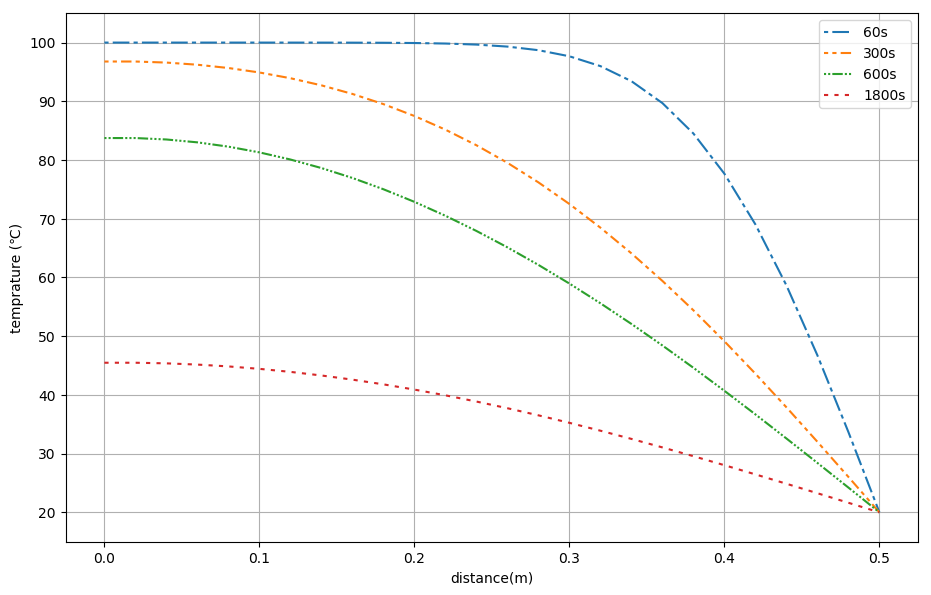

In [2]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.xlabel('distance(m)')
plt.ylabel('temprature (℃)')
plt.ylim([15,105])
plt.grid(True)
line1, = plt.plot(x, T_result_1[0], dashes=[2, 2, 8, 2], label='60s')  
line2, = plt.plot(x, T_result_1[1], dashes=[2,2,2,2,5,2], label='300s')
line3, = plt.plot(x, T_result_1[2], dashes=[1,1,1,1,5,1,1,1], label='600s')
line4, = plt.plot(x, T_result_1[3], dashes=[2,3], label='1800s')
plt.legend()

#### 2、克拉克-尼科尔森格式
求解时间选择一阶向前差分，空间选择二阶中心差分，有：
$$\frac{T^{n+1}_i - T^n_i}{\Delta t}=\alpha \frac{\frac{T^{n+1}_{i+1}+T^{n}_{i+1}}{2}-\frac{2T^{n+1}_i +2T^{n}_i}{2}+\frac{T^{n+1}_{i-1}|+T^{n}_{i-1}}{2}}{\Delta x^2}\tag{1-6}$$
设$r = \frac{\alpha\Delta t}{2\Delta x^2}$进而有：
$$-rT_{i-1}^{n+1}+(1+2r)T_{i}^{n+1}-rT_{i+1}^{n+1}=rT_{i-1}^{n}+(1-2r)T_{i}^{n}+rT_{i+1}^{n}\tag{1-7}$$
继而有：
$$\begin{bmatrix}
(1+2r) &-r &0  &\cdots  \\
-r &(1+2r) &-r    &\cdots  \\
&-r &(1+2r)  &\cdots  \\
\vdots & \vdots &  \vdots& \ddots& \vdots & \vdots  & \vdots\\
 &&&\cdots   &-r &(1+2r) &-r \\
 &&&\cdots  &0&-r &(1+2r)\\
\end{bmatrix}
\begin{bmatrix}
T_1^{n+1} \\
T_2^{n+1} \\
T_3^{n+1} \\
\vdots \\
T_{i-1}^{n+1} \\
T_{i}^{n+1} \\
\end{bmatrix}=
\begin{bmatrix}
K_1^{n} \\
K_2^{n} \\
K_3^{n} \\
\vdots \\
K_{i-1}^{n} \\
K_{i}^{n} \\
\end{bmatrix}\tag{1-8}$$
其中$K_i^n=rT_{i-1}^{n}+(1-2r)T_{i}^{n}+rT_{i+1}^{n}$。 通过追赶法求解上述三对角矩阵方程。定义求解函数： 

In [3]:
def TDMAsolver(a, b, c, d):
    nf = len(d) # 方程数量
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # 复制矩阵
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
                
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

采用与显式格式同样的时间步长与网格尺寸，$dx=0.02，dt=2$。则有网格节点26个，即有26个方程需连立求解。分别迭代30次，150次，300次，900次。

In [4]:
r = alpha*dt/(2*dx**2) #计算r
a = np.zeros(n-1)-r    #下对角线
b = np.ones(n)+2*r     #对角线
c = np.zeros(n-1)-r    #上对角线
K = T.copy()           #K矩阵
T_result_2 =np.ndarray((len(t_step),n))    #设置输出
for case in range(len(t_step)):
    T_result_2[case]=T.copy()
    for ti in range(int(t_step[case]/dt)):
        K[0] = T_result_2[case][1]*(1+r)
        K[1:-1]= r*T_result_2[case][:-2]+(1-2*r)*T_result_2[case][1:-1]+r*T_result_2[case][2:]
        K[-1] = (1+2*r)/2*(-2*dx*(T_result_2[case][-1]-T_far)*h/lambda_wall+T_result_2[case][-1]+T_far)-r*T_result_2[case][-2]
        T_result_2[case] = TDMAsolver(a, b, c, K)
#print(T_result_2)

从而得到26个节点处在$60s，300s，600s，1800s$时刻的温度如下表所示：  

|*节点编号*|0|1|2|3|4|5|6|7|8|9|10|11|12|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|**60s**|*100.000*|100.000|100.000|100.000|99.999|99.998|99.994|99.987|99.972|99.942|99.880|99.763|99.545|
|**300s**|96.966|96.911|96.684|96.281|95.694|94.909|93.914|92.689|91.218|89.479|87.455|85.125|82.475|
|**600s**|84.420|84.343|84.027|83.473|82.682|81.654|80.391|78.894|77.168|75.214|73.037|70.643|68.036|
|**1800s**|46.419|46.385|46.245|46.000|45.651|45.199|44.647|43.996|43.248|42.408|41.478|40.462|39.364|
|***节点编号***|**13**|**14**|**15**|**16**|**17**|**18**|**19**|**20**|**21**|**22**|**23**|**24**|**25**|
|**60s**|99.158|98.497|97.412|95.704|93.127|89.405|84.262|77.467|68.890|58.554|46.661|33.606|19.932|
|**300s**|79.490|76.160|72.482|68.456|64.089|59.397|54.399|49.124|43.607|37.888|32.012|26.030|19.994|
|**600s**|65.226|62.219|59.027|55.661|52.132|48.456|44.647|40.722|36.698|32.594|28.430|24.224|19.998|
|**1800s**|38.189|36.941|35.625|34.246|32.811|31.324|29.792|28.220|26.616|24.985|23.334|21.670|19.999|

## 二
二维稳态传热问题，其控制方程为：
$$\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}=0\tag{2-1}$$
二维导热体如图所示，![图示](zuoye.png)
长宽均为$1m,\Delta x = \Delta =0.2m,$四边界分别维持$200°C，200°C，400°C$和$400℃$$（其中400°C于200°C交界的外角节点温度视为400°C）$。试用简单迭代、G-S迭代和松弛迭代法分别求解各内部节点温度。（松弛因子取1.1，计算的收敛条件为$max\big| T_i^{k+1}-T_i^k\big | < 0.001$,至少精确到$0.001°C$，要求给出各迭代步值并给出各迭代收敛所需迭代步数）

#### 解：
空间选择中心差分格式有：
$$\frac{T_{i+1, j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} + \frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i, j-1}^n}{\Delta y^2} = 0 \tag {2-2}$$
因为稳态问题不存在时间项因而不存在$T^{n+1}$,通过整理离散方程，得到  $T_{i,j}^n$:
$$T_{i,j}^n = \frac{\Delta y^2(T_{i+1,j}^n+T_{i-1,j}^n)+\Delta x^2(T_{i,j+1}^n + T_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}\tag {2-3}$$
对于Jacobi迭代法（即简单迭代）有：
$$x_i^{(k+1)}=\frac{1}{a_{ii}}(b_i-\sum_{j=1}^{i-1} a_{ij}x_{j}^{(k)}-\sum_{j=i+1}^{n} a_{ij}x_j^{(k)}\tag {2-4})$$
对于G-S迭代法有：
$$x_i^{(k+1)}=\frac{1}{a_{ii}}(b_i-\sum_{j=1}^{i-1} a_{ij}x_{j}^{(k+1)}-\sum_{j=i+1}^{n} a_{ij}x_j^{(k)})\tag {2-5}$$
对于松弛迭代法有：
$$x_i^{(k+1)}=x_i^{(k)}+\frac{\omega}{a_{ii}}(b_i-\sum_{j=1}^{i-1} a_{ij}x_{j}^{(k+1)}-\sum_{j=i+1}^{n} a_{ij}x_j^{(k)})\tag {2-6}$$
其中$\omega$为松弛因子，此处取作1.1。

In [5]:
#Jacobi迭代
def Jacobi_laplace2d(T, dx, dy, l1norm_target):
    l1norm = 1
    Tn = np.empty_like(T)
    Tm = T.copy()
    flag=0
    while l1norm > l1norm_target:
        Tn = Tm.copy()
        Tm[1:-1, 1:-1] = ((dy**2 * (Tn[1:-1, 2:] + Tn[1:-1, 0:-2]) + dx**2 * (Tn[2:, 1:-1] + Tn[0:-2, 1:-1])) /(2 * (dx**2 + dy**2)))  
        l1norm = np.max(np.abs(Tm[:]) - np.abs(Tn[:]))   
        flag += 1
        #print("[",flag,np.reshape(Tm[1:-1,1:-1],16))
    return Tm
#G-S迭代
def GS_laplace2d(T, dx, dy, l1norm_target):
    l1norm = 1
    flag=0
    Tn = np.empty_like(T)
    Tm = T.copy()
    while l1norm > l1norm_target:
        Tn = Tm.copy()
        for i in range(1,len(T)-1):
            for j in range(1,len(T)-1):
                Tm[i,j]= (dy**2*(Tm[i-1,j]+Tm[i+1,j])+dx**2*(Tm[i,j-1]+Tm[i,j+1]))/(2*(dx**2+dy**2)) 
        l1norm = np.max(np.abs(Tm[:]) - np.abs(Tn[:]))
        flag += 1
        #print("[",flag,np.reshape(Tm[1:-1,1:-1],16))
    return Tm
#松弛迭代
def Sor_laplace2d(T, dx, dy, l1norm_target,w):
    l1norm = 1
    flag=0
    Tn = np.empty_like(T)
    Tm = T.copy()
    while l1norm > l1norm_target:
        Tn = Tm.copy()
        for i in range(1,len(T)-1):
            for j in range(1,len(T)-1):
                Tm[i,j]= Tm[i,j]-w/(2*(dx**2+dy**2)/(dx**2*dy**2))*((2*(dx**2+dy**2)/(dx**2*dy**2))*Tm[i,j]-(Tm[i-1,j]+Tm[i+1,j])/dx**2-(Tm[i,j-1]+Tm[i,j+1])/dy**2)
        l1norm = np.max(np.abs(Tm[:]) - np.abs(Tn[:]))   
        flag += 1
        #print("[",flag,np.reshape(Tm[1:-1,1:-1],16))
    return Tm

In [6]:
dx_1 = 0.2    #设置dx
dy_1 = 0.2    #设置dy
T_1= np.zeros((6,6))+200   
T_1[:, 0] = 200  # T = 200 @ x = 0
T_1[0, :] = 200  # T = 200 @ y = 0
T_1[:, -1] = 400  # T = 400 @ x = 1
T_1[-1, :] = 400  # T = 400 @ y = 1  
l1norm_target = 0.001   #收敛判断条件
w = 1.1     #松弛因子
T_Jacobi = Jacobi_laplace2d(T_1, dx_1, dy_1, l1norm_target)
T_GS = GS_laplace2d(T_1, dx_1, dy_1, l1norm_target)
T_Sor = Sor_laplace2d(T_1, dx_1, dy_1, l1norm_target, w)
#print(T_1result，T_GS ，T_Sor)

分别采用三种迭代格式求解，所得见下表：

|J迭代|2-2|2-3|2-4|2-5|3-2|3-3|3-4|3-5|4-2|4-3|4-4|4-5|5-2|5-3|5-4|5-5|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 1 | 200.000|200.000|200.000|250.000|200.000|200.000|200.000|250.000|200.000|200.000|200.000|250.000|250.000|250.000|250.000|300.000|
| 2 | 200.000|200.000|212.500|262.500|200.000|200.000|212.500|275.000|212.500|212.500|225.000|287.500|262.500|275.000|287.500|325.000|
| 3 | 200.000|203.125|218.750|271.875|203.125|206.250|228.125|290.625|218.750|228.125|250.000|306.250|271.875|290.625|306.250|343.750|
| 4 | 201.562|206.250|225.781|277.344|206.250|215.625|241.406|301.562|225.781|241.406|267.188|321.094|277.344|301.562|321.094|353.125|
| 5 | 203.125|210.742|231.250|281.836|210.742|223.828|252.539|309.961|231.250|252.539|281.250|330.469|281.836|309.961|330.469|360.547|
| 6 | 205.371|214.551|236.279|285.303|214.551|231.641|261.572|316.211|236.279|261.572|291.504|337.939|285.303|316.211|337.939|365.234|
| 7 | 207.275|218.323|240.356|288.123|218.323|238.062|268.909|321.204|240.356|268.909|299.756|343.237|288.123|321.204|343.237|368.970|
| 8 | 209.161|221.423|243.839|290.390|221.423|243.616|274.844|325.067|243.839|274.844|306.073|347.482|290.390|325.067|347.482|371.619|
| 9 | 210.712|224.154|246.664|292.226|224.154|248.134|279.649|328.179|246.664|279.649|311.163|350.690|292.226|328.179|350.690|373.741|
| 10 | 212.077|226.377|249.007|293.711|226.377|251.901|283.535|330.641|249.007|283.535|315.169|353.271|293.711|330.641|353.271|375.345|
| 11 | 213.189|228.246|250.906|294.912|228.246|254.956|286.680|332.629|250.906|286.680|318.403|355.289|294.912|332.629|355.289|376.635|
| 12 | 214.123|229.763|252.460|295.884|229.763|257.463|289.224|334.220|252.460|289.224|320.984|356.917|295.884|334.220|356.917|377.644|
| 13 | 214.881|231.011|253.718|296.670|231.011|259.493|291.282|335.506|253.718|291.282|323.070|358.212|296.670|335.506|358.212|378.458|
| 14 | 215.506|232.023|254.741|297.306|232.023|261.147|292.947|336.541|254.741|292.947|324.747|359.259|297.306|336.541|359.259|379.106|
| 15 | 216.012|232.848|255.569|297.820|232.848|262.485|294.294|337.378|255.569|294.294|326.103|360.099|297.820|337.378|360.099|379.629|
| 16 | 216.424|233.516|256.241|298.237|233.516|263.571|295.384|338.053|256.241|295.384|327.196|360.777|298.237|338.053|360.777|380.049|
| 17 | 216.758|234.059|256.784|298.573|234.059|264.450|296.265|338.599|256.784|296.265|328.081|361.325|298.573|338.599|361.325|380.389|
| 18 | 217.029|234.498|257.224|298.846|234.498|265.162|296.979|339.041|257.224|296.979|328.795|361.767|298.846|339.041|361.767|380.662|
| 19 | 217.249|234.854|257.581|299.066|234.854|265.738|297.556|339.398|257.581|297.556|329.373|362.125|299.066|339.398|362.125|380.884|
| 20 | 217.427|235.142|257.869|299.245|235.142|266.205|298.022|339.687|257.869|298.022|329.840|362.414|299.245|339.687|362.414|381.062|
| 21 | 217.571|235.375|258.102|299.389|235.375|266.582|298.400|339.920|258.102|298.400|330.218|362.647|299.389|339.920|362.647|381.207|
| 22 | 217.688|235.564|258.291|299.506|235.564|266.888|298.706|340.109|258.291|298.706|330.524|362.836|299.506|340.109|362.836|381.324|
| 23 | 217.782|235.717|258.444|299.600|235.717|267.135|298.953|340.262|258.444|298.953|330.771|362.989|299.600|340.262|362.989|381.418|
| 24 | 217.858|235.840|258.567|299.676|235.840|267.335|299.153|340.385|258.567|299.153|330.971|363.113|299.676|340.385|363.113|381.495|
| 25 | 217.920|235.940|258.667|299.738|235.940|267.496|299.315|340.485|258.667|299.315|331.133|363.213|299.738|340.485|363.213|381.556|
| 26 | 217.970|236.021|258.748|299.788|236.021|267.627|299.446|340.566|258.748|299.446|331.264|363.294|299.788|340.566|363.294|381.606|
| 27 | 218.010|236.086|258.814|299.829|236.086|267.733|299.551|340.632|258.814|299.551|331.370|363.359|299.829|340.632|363.359|381.647|
| 28 | 218.043|236.139|258.867|299.861|236.139|267.819|299.637|340.685|258.867|299.637|331.455|363.412|299.861|340.685|363.412|381.680|
| 29 | 218.070|236.182|258.909|299.888|236.182|267.888|299.706|340.728|258.909|299.706|331.525|363.455|299.888|340.728|363.455|381.706|
| 30 | 218.091|236.217|258.944|299.909|236.217|267.944|299.762|340.762|258.944|299.762|331.581|363.490|299.909|340.762|363.490|381.727|
| 31 | 218.108|236.245|258.972|299.927|236.245|267.990|299.808|340.790|258.972|299.808|331.626|363.518|299.927|340.790|363.518|381.745|
| 32 | 218.122|236.268|258.995|299.941|236.268|268.026|299.845|340.813|258.995|299.845|331.663|363.540|299.941|340.813|363.540|381.759|
| 33 | 218.134|236.286|259.013|299.952|236.286|268.056|299.874|340.831|259.013|299.874|331.692|363.559|299.952|340.831|363.559|381.770|
| 34 | 218.143|236.301|259.028|299.961|236.301|268.080|299.898|340.846|259.028|299.898|331.716|363.573|299.961|340.846|363.573|381.779|
| 35 | 218.150|236.313|259.040|299.969|236.313|268.099|299.918|340.858|259.040|299.918|331.736|363.585|299.969|340.858|363.585|381.787|
| 36 | 218.156|236.322|259.050|299.975|236.322|268.115|299.933|340.868|259.050|299.933|331.752|363.595|299.975|340.868|363.595|381.793|
| 37 | 218.161|236.330|259.058|299.979|236.330|268.128|299.946|340.876|259.058|299.946|331.764|363.603|299.979|340.876|363.603|381.798|
| 38 | 218.165|236.337|259.064|299.983|236.337|268.138|299.956|340.882|259.064|299.956|331.775|363.609|299.983|340.882|363.609|381.802|
| 39 | 218.168|236.342|259.069|299.987|236.342|268.147|299.965|340.887|259.069|299.965|331.783|363.615|299.987|340.887|363.615|381.805|
| 40 | 218.171|236.346|259.073|299.989|236.346|268.153|299.971|340.891|259.073|299.971|331.790|363.619|299.989|340.891|363.619|381.807|
| 41 | 218.173|236.349|259.077|299.991|236.349|268.159|299.977|340.895|259.077|299.977|331.795|363.622|299.991|340.895|363.622|381.809|
| 42 | 218.175|236.352|259.079|299.993|236.352|268.163|299.981|340.898|259.079|299.981|331.800|363.625|299.993|340.898|363.625|381.811|
| 43 | 218.176|236.354|259.082|299.994|236.354|268.167|299.985|340.900|259.082|299.985|331.803|363.627|299.994|340.900|363.627|381.812|
| 44 | 218.177|236.356|259.083|299.995|236.356|268.170|299.988|340.902|259.083|299.988|331.806|363.629|299.995|340.902|363.629|381.814|
| 45 | 218.178|236.358|259.085|299.996|236.358|268.172|299.990|340.903|259.085|299.990|331.808|363.630|299.996|340.903|363.630|381.814|
| 46 | 218.179|236.359|259.086|299.997|236.359|268.174|299.992|340.904|259.086|299.992|331.810|363.631|299.997|340.904|363.631|381.815|
| 47 | 218.179|236.360|259.087|299.998|236.360|268.175|299.994|340.905|259.087|299.994|331.812|363.632|299.998|340.905|363.632|381.816|
| 48 | 218.180|236.360|259.088|299.998|236.360|268.177|299.995|340.906|259.088|299.995|331.813|363.633|299.998|340.906|363.633|381.816|
| 49 | 218.180|236.361|259.088|299.998|236.361|268.178|299.996|340.906|259.088|299.996|331.814|363.634|299.998|340.906|363.634|381.817|

|GS迭代|2-2|2-3|2-4|2-5|3-2|3-3|3-4|3-5|4-2|4-3|4-4|4-5|5-2|5-3|5-4|5-5|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 1 | 200.000|200.000|200.000|250.000|200.000|200.000|200.000|262.500|200.000|200.000|200.000|265.625|250.000|262.500|265.625|332.812|
| 2 | 200.000|200.000|212.500|268.750|200.000|200.000|218.750|288.281|212.500|218.750|242.188|315.820|268.750|288.281|315.820|357.910|
| 3 | 200.000|203.125|222.656|277.734|203.125|210.938|241.016|308.643|222.656|241.016|278.418|336.243|277.734|308.643|336.243|368.121|
| 4 | 201.562|208.789|231.885|285.132|208.789|224.902|260.962|320.584|231.885|260.962|298.602|346.827|285.132|320.584|346.827|373.413|
| 5 | 204.395|215.295|240.347|290.233|215.295|238.129|274.416|327.869|240.347|274.416|310.621|352.976|290.233|327.869|352.976|376.488|
| 6 | 207.648|221.531|246.545|293.603|221.531|247.973|283.252|332.458|246.545|283.252|318.114|356.765|293.603|332.458|356.765|378.382|
| 7 | 210.765|226.321|250.794|295.813|226.321|254.786|289.038|335.404|250.794|289.038|322.902|359.172|295.813|335.404|359.172|379.586|
| 8 | 213.160|229.685|253.634|297.260|229.685|259.362|292.825|337.314|253.634|292.825|325.999|360.725|297.260|337.314|360.725|380.362|
| 9 | 214.843|231.960|255.511|298.206|231.960|262.392|295.304|338.559|255.511|295.304|328.014|361.734|298.206|338.559|361.734|380.867|
| 10 | 215.980|233.471|256.745|298.826|233.471|264.387|296.926|339.372|256.745|296.926|329.330|362.392|298.826|339.372|362.392|381.196|
| 11 | 216.735|234.467|257.555|299.232|234.467|265.697|297.988|339.903|257.555|297.988|330.190|362.822|299.232|339.903|362.822|381.411|
| 12 | 217.234|235.121|258.085|299.497|235.121|266.555|298.683|340.251|258.085|298.683|330.753|363.104|299.497|340.251|363.104|381.552|
| 13 | 217.561|235.550|258.433|299.671|235.550|267.117|299.138|340.478|258.433|299.138|331.121|363.288|299.671|340.478|363.288|381.644|
| 14 | 217.775|235.831|258.660|299.785|235.831|267.485|299.436|340.627|258.660|299.436|331.362|363.408|299.785|340.627|363.408|381.704|
| 15 | 217.916|236.015|258.809|299.859|236.015|267.726|299.631|340.725|258.809|299.631|331.520|363.487|299.859|340.725|363.487|381.744|
| 16 | 218.008|236.135|258.906|299.908|236.135|267.883|299.758|340.788|258.906|299.758|331.623|363.539|299.908|340.788|363.539|381.769|
| 17 | 218.068|236.214|258.970|299.940|236.214|267.986|299.842|340.830|258.970|299.842|331.690|363.572|299.940|340.830|363.572|381.786|
| 18 | 218.107|236.266|259.012|299.960|236.266|268.054|299.896|340.857|259.012|299.896|331.734|363.594|299.960|340.857|363.594|381.797|
| 19 | 218.133|236.300|259.039|299.974|236.300|268.098|299.932|340.875|259.039|299.932|331.763|363.609|299.974|340.875|363.609|381.804|
| 20 | 218.150|236.322|259.057|299.983|236.322|268.127|299.956|340.887|259.057|299.956|331.782|363.618|299.983|340.887|363.618|381.809|
| 21 | 218.161|236.336|259.069|299.989|236.336|268.146|299.971|340.895|259.069|299.971|331.795|363.625|299.989|340.895|363.625|381.812|
| 22 | 218.168|236.346|259.076|299.993|236.346|268.158|299.981|340.900|259.076|299.981|331.803|363.629|299.993|340.900|363.629|381.814|
| 23 | 218.173|236.352|259.081|299.995|236.352|268.166|299.988|340.903|259.081|299.988|331.808|363.631|299.995|340.903|363.631|381.816|
| 24 | 218.176|236.356|259.085|299.997|236.356|268.172|299.992|340.905|259.085|299.992|331.812|363.633|299.997|340.905|363.633|381.817|
| 25 | 218.178|236.359|259.087|299.998|236.359|268.175|299.995|340.906|259.087|299.995|331.814|363.634|299.998|340.906|363.634|381.817|
| 26 | 218.179|236.360|259.088|299.999|236.360|268.178|299.997|340.907|259.088|299.997|331.815|363.635|299.999|340.907|363.635|381.817|
| 27 | 218.180|236.361|259.089|299.999|236.361|268.179|299.998|340.908|259.089|299.998|331.816|363.635|299.999|340.908|363.635|381.818|
| 28 | 218.181|236.362|259.090|299.999|236.362|268.180|299.999|340.908|259.090|299.999|331.817|363.636|299.999|340.908|363.636|381.818|

|Sor迭代|2-2|2-3|2-4|2-5|3-2|3-3|3-4|3-5|4-2|4-3|4-4|4-5|5-2|5-3|5-4|5-5|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 1 | 200.000|200.000|200.000|255.000|200.000|200.000|200.000|270.125|200.000|200.000|200.000|274.284|255.000|270.125|274.284|350.856|
| 2 | 200.000|200.000|215.125|272.944|200.000|200.000|223.444|294.922|215.125|223.444|253.750|329.942|272.944|294.922|329.942|366.383|
| 3 | 200.000|204.159|226.138|280.997|204.159|215.182|249.904|317.240|226.138|249.904|293.540|345.725|280.997|317.240|345.725|373.511|
| 4 | 202.288|211.576|236.567|289.197|211.576|232.296|271.911|327.655|236.567|271.911|310.346|353.593|289.197|327.655|353.593|377.125|
| 5 | 206.138|219.468|246.002|293.836|219.468|247.029|283.843|333.334|246.002|283.843|319.555|357.895|293.836|333.334|357.895|379.130|
| 6 | 210.093|226.412|251.525|296.453|226.412|255.937|290.712|336.558|251.525|290.712|324.778|360.339|296.453|336.558|360.339|380.273|
| 7 | 213.517|230.628|254.741|297.962|230.628|261.144|294.664|338.410|254.741|294.664|327.774|361.742|297.962|338.410|361.742|380.931|
| 8 | 215.494|233.066|256.591|298.829|233.066|264.137|296.934|339.473|256.591|296.934|329.495|362.548|298.829|339.473|362.548|381.308|
| 9 | 216.637|234.469|257.655|299.327|234.469|265.858|298.239|340.084|257.655|298.239|330.483|363.011|299.327|340.084|363.011|381.525|
| 10 | 217.294|235.275|258.266|299.613|235.275|266.847|298.988|340.435|258.266|298.988|331.051|363.277|299.613|340.435|363.277|381.650|
| 11 | 217.672|235.738|258.617|299.778|235.738|267.415|299.419|340.637|258.617|299.419|331.377|363.430|299.778|340.637|363.430|381.721|
| 12 | 217.889|236.004|258.819|299.872|236.004|267.741|299.666|340.753|258.819|299.666|331.565|363.518|299.872|340.753|363.518|381.763|
| 13 | 218.013|236.157|258.934|299.927|236.157|267.929|299.808|340.819|258.934|299.808|331.673|363.568|299.927|340.819|363.568|381.786|
| 14 | 218.085|236.245|259.001|299.958|236.245|268.036|299.890|340.857|259.001|299.890|331.735|363.597|299.958|340.857|363.597|381.800|
| 15 | 218.126|236.295|259.039|299.976|236.295|268.098|299.937|340.879|259.039|299.937|331.770|363.614|299.976|340.879|363.614|381.808|
| 16 | 218.150|236.324|259.061|299.986|236.324|268.134|299.964|340.892|259.061|299.964|331.791|363.623|299.986|340.892|363.623|381.812|
| 17 | 218.163|236.341|259.074|299.992|236.341|268.154|299.979|340.899|259.074|299.979|331.802|363.629|299.992|340.899|363.629|381.815|
| 18 | 218.171|236.351|259.081|299.995|236.351|268.166|299.988|340.903|259.081|299.988|331.809|363.632|299.995|340.903|363.632|381.816|
| 19 | 218.176|236.356|259.085|299.997|236.356|268.173|299.993|340.906|259.085|299.993|331.813|363.634|299.997|340.906|363.634|381.817|
| 20 | 218.178|236.359|259.088|299.998|236.359|268.177|299.996|340.907|259.088|299.996|331.815|363.635|299.998|340.907|363.635|381.818|
| 21 | 218.180|236.361|259.089|299.999|236.361|268.179|299.998|340.908|259.089|299.998|331.816|363.636|299.999|340.908|363.636|381.818|
| 22 | 218.181|236.362|259.090|299.999|236.362|268.180|299.999|340.908|259.090|299.999|331.817|363.636|299.999|340.908|363.636|381.818|
| 23 | 218.181|236.363|259.090|300.000|236.363|268.181|299.999|340.909|259.090|299.999|331.818|363.636|300.000|340.909|363.636|381.818|

##### 修正内容：
1、对第一题隐式求解结果表格的打印错误进行了修正，60s时0号节点温度由1100°C改为100°C；  

2、对第二题的初始化温度场选择进行了优化，由0°C改为200°C。并更新了迭代结果表格。